После каждой обработки данных/графика/теста обязателен вывод

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('drive/MyDrive/howpop_train.csv')
df.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,0.446090,1.794023,0.574656
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,1.627469,1.300050,1.167375
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,1.362397,0.961094,2.020356


## 1. Проведите первичный анализ данных

1.1. Изучить данные

In [ ]:
# Количество строк и столбцов в датафрейме
df.shape

(134137, 17)

In [ ]:
# Основная информация о числе непустых значений в столбцах и их типах в таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134137 entries, 0 to 134136
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   url               134137 non-null  object 
 1   domain            134137 non-null  object 
 2   post_id           134137 non-null  int64  
 3   published         134137 non-null  object 
 4   author            97657 non-null   object 
 5   flow              97048 non-null   object 
 6   polling           134137 non-null  bool   
 7   content_len       134137 non-null  int64  
 8   title             134137 non-null  object 
 9   comments          134137 non-null  int64  
 10  favs              134137 non-null  int64  
 11  views             134137 non-null  int64  
 12  votes_plus        133566 non-null  float64
 13  votes_minus       133566 non-null  float64
 14  views_lognorm     134137 non-null  float64
 15  favs_lognorm      134137 non-null  float64
 16  comments_lognorm  13

In [ ]:
# Статистическая сводка
df.describe()

,post_id,content_len,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
count,134137.000000,134137.000000,134137.000000,134137.000000,1.341370e+05,133566.000000,133566.000000,134137.000000,134137.000000,134137.000000
mean,181307.054265,7516.929699,39.625994,71.999866,1.663101e+04,35.536888,8.050035,0.004849,0.003402,-0.003675
std,81766.350702,8724.771640,62.398958,145.854135,3.147982e+04,42.461073,11.398282,1.002158,1.002778,1.005259
min,18284.000000,1.000000,0.000000,0.000000,3.000000e+00,0.000000,0.000000,-6.615254,-4.137662,-4.161967
25%,115565.000000,2179.000000,7.000000,8.000000,2.100000e+03,11.000000,2.000000,-0.706552,-0.695780,-0.633775
50%,182666.000000,4949.000000,19.000000,27.000000,7.600000e+03,22.000000,5.000000,-0.020934,0.007022,0.072082
75%,257401.000000,9858.000000,48.000000,78.000000,1.870000e+04,45.000000,10.000000,0.682689,0.708778,0.697072
max,314088.000000,352471.000000,2266.000000,8718.000000,1.730000e+06,1466.000000,445.000000,5.182821,4.872866,3.900973


In [ ]:
df.describe(include='object')

,url,domain,published,author,flow,title
count,134137,134137,134137,97657,97048,134137
unique,134137,2,130291,22077,6,133628
top,https://habrahabr.ru/post/18284/,habrahabr.ru,2011-06-14 15:52:00,@alizar,develop,"Интересные события, произошедшие в выходные"
freq,1,97048,39,5292,53318,56


In [ ]:
df.describe(include = "all")

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
count,134137,134137,134137.000000,134137,97657,97048,134137,134137.000000,134137,134137.000000,134137.000000,1.341370e+05,133566.000000,133566.000000,134137.000000,134137.000000,134137.000000
unique,134137,2,NaN,130291,22077,6,2,NaN,133628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,https://habrahabr.ru/post/18284/,habrahabr.ru,NaN,2011-06-14 15:52:00,@alizar,develop,False,NaN,"Интересные события, произошедшие в выходные",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,97048,NaN,39,5292,53318,129412,NaN,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,181307.054265,NaN,NaN,NaN,NaN,7516.929699,NaN,39.625994,71.999866,1.663101e+04,35.536888,8.050035,0.004849,0.003402,-0.003675
std,NaN,NaN,81766.350702,NaN,NaN,NaN,NaN,8724.771640,NaN,62.398958,145.854135,3.147982e+04,42.461073,11.398282,1.002158,1.002778,1.005259
min,NaN,NaN,18284.000000,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,0.000000,3.000000e+00,0.000000,0.000000,-6.615254,-4.137662,-4.161967
25%,NaN,NaN,115565.000000,NaN,NaN,NaN,NaN,2179.000000,NaN,7.000000,8.000000,2.100000e+03,11.000000,2.000000,-0.706552,-0.695780,-0.633775
50%,NaN,NaN,182666.000000,NaN,NaN,NaN,NaN,4949.000000,NaN,19.000000,27.000000,7.600000e+03,22.000000,5.000000,-0.020934,0.007022,0.072082
75%,NaN,NaN,257401.000000,NaN,NaN,NaN,NaN,9858.000000,NaN,48.000000,78.000000,1.870000e+04,45.000000,10.000000,0.682689,0.708778,0.697072


In [ ]:
df['polling'].value_counts()

,count
polling,
False,129412
True,4725


Вывод: данный датафрейм содержит 17 столбцов. Также в датафрейме присутствуют пропуски (NaN). Некоторые данные приведены к логонормальному виду: views_lognorm, favs_lognorm, comments_lognor.

1.2. Обработать пропуски

In [ ]:
# Проверка на пропуски
df.isnull().sum()

url                     0
domain                  0
post_id                 0
published               0
author              36480
flow                37089
polling                 0
content_len             0
title                   0
comments                0
favs                    0
views                   0
votes_plus            571
votes_minus           571
views_lognorm           0
favs_lognorm            0
comments_lognorm        0
dtype: int64

In [ ]:
df.fillna(value= 0 , inplace= True )

In [ ]:
# Проверка на пропуски
df.isnull().sum()

url                 0
domain              0
post_id             0
published           0
author              0
flow                0
polling             0
content_len         0
title               0
comments            0
favs                0
views               0
votes_plus          0
votes_minus         0
views_lognorm       0
favs_lognorm        0
comments_lognorm    0
dtype: int64

Вывод: как видно, в столбцах author, flow, votes_plus, votes_minus, пустые значения были заменены на нулевые для возможности обработки данных.

1.3. Преобразовать признаки, если требуется

In [ ]:
df['published'] = pd.to_datetime(df['published'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
df['published'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 134137 entries, 0 to 134136
Series name: published
Non-Null Count   Dtype         
--------------   -----         
134137 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.0 MB


Вывод: признак published был преобразован из типа object в тип datatime, чтобы иметь возможность обращаться к данным, как к дате и времени.

1.4. Построить графики для общего понимания данных

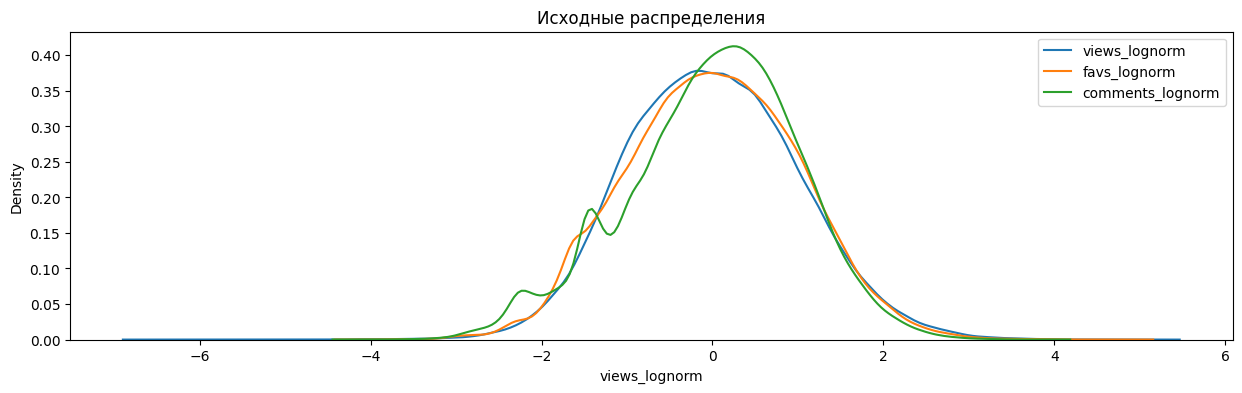

In [ ]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(15, 4))
ax1.set_title('Исходные распределения')

sns.kdeplot(df['views_lognorm'], ax=ax1, label ='views_lognorm')
sns.kdeplot(df['favs_lognorm'], ax=ax1, label ='favs_lognorm')
sns.kdeplot(df['comments_lognorm'], ax=ax1, label ='comments_lognorm')
plt.legend()

Вовод: распределение исходных данных -- приближено к нормальному, но не является таковым.

Отсекаем выбросы у views, comments и favs:

In [ ]:
def outliers_iqr(data, feature, left=1.5, right=1.5):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [ ]:
outliers1, cleaned1 = outliers_iqr(df, 'views')
outliers2, cleaned2 = outliers_iqr(df, 'favs')
outliers3, cleaned3 = outliers_iqr(df, 'comments')

In [ ]:
fig, (ax2) = plt.subplots(ncols=1, figsize=(15, 4))
ax2.set_title('Исходные распределения')

sns.kdeplot(data=cleaned1, ax=ax1, label ='views')
sns.kdeplot(data=cleaned2, ax=ax1, label ='favs_lognorm')
sns.kdeplot(data=cleaned3, ax=ax1, label ='comments_lognorm')
plt.legend()

In [ ]:
outliers, cleaned = outliers_iqr(df, 'views')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 11715
Результирующее число записей: 122422


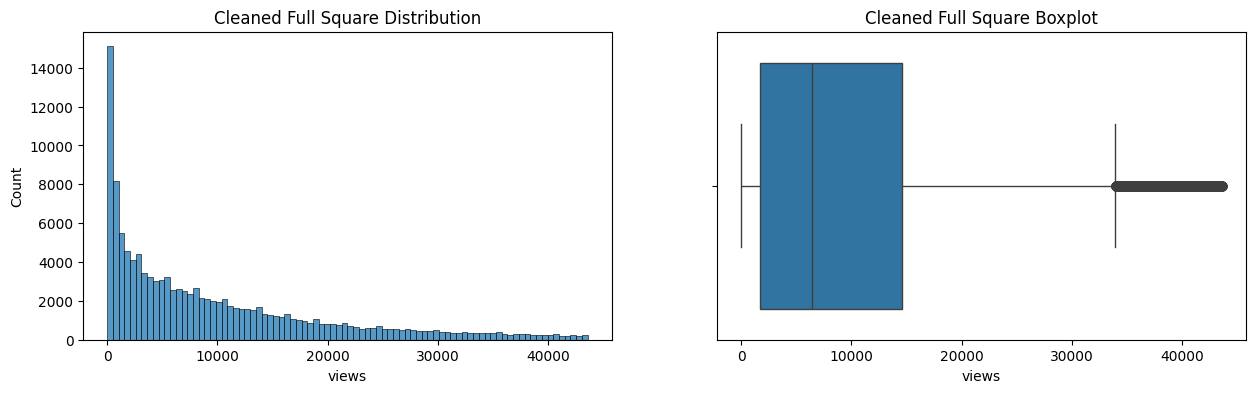

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='views', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='views', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');

In [ ]:
outliers, cleaned = outliers_iqr(df, 'favs')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 12863
Результирующее число записей: 121274


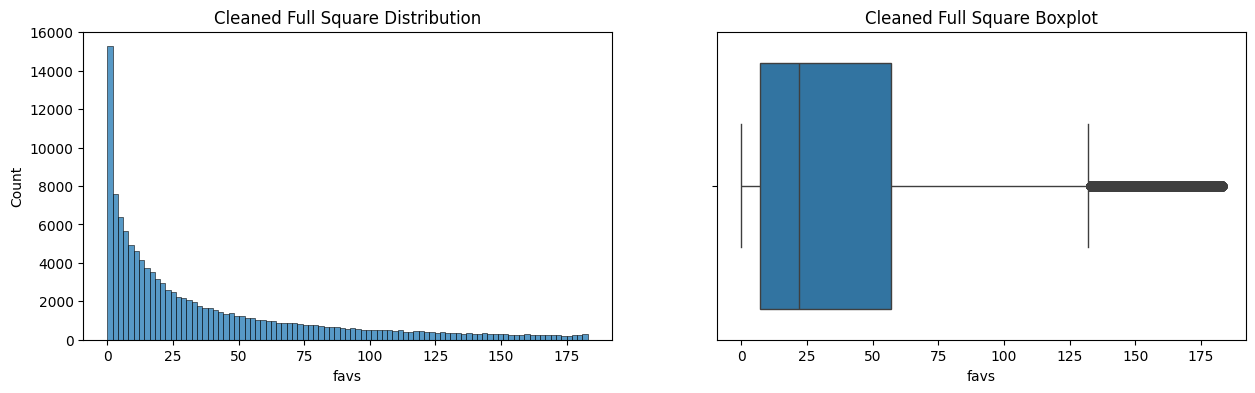

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='favs', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='favs', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');

In [ ]:
outliers, cleaned = outliers_iqr(df, 'comments')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 10958
Результирующее число записей: 123179


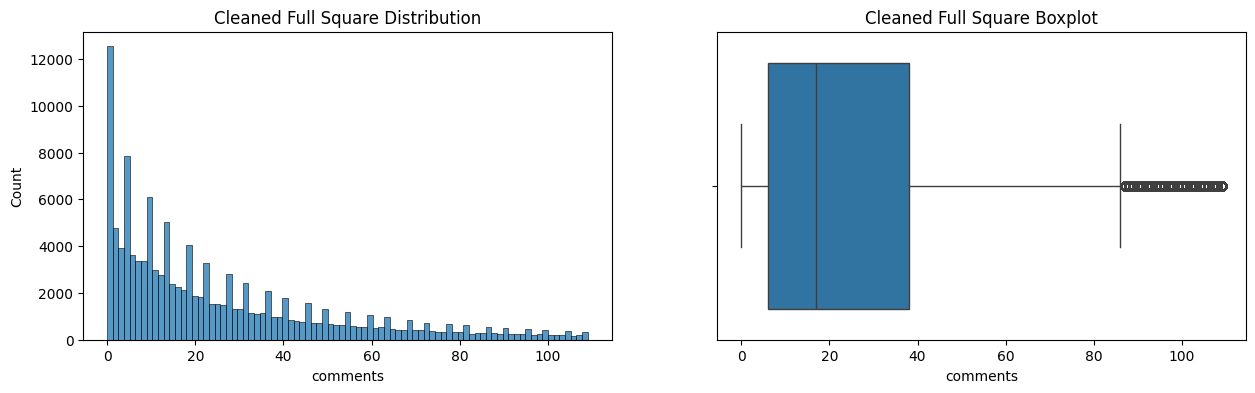

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='comments', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='comments', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');

Вывод: как видно, ни один из рассмотренных признаков не имеет нормальный вид распределения.

ВЫВОДЫ: видно, что нормализованные переменные (views_lognorm, favs_lognorm, comments_lognorm) имеют более нормальное распределение, чем исходные переменные (views, favorites, comments).

## 2. Проверить данные на нормальность (2-3 столбца)

In [ ]:
import scipy.stats as stats
from scipy.stats import normaltest

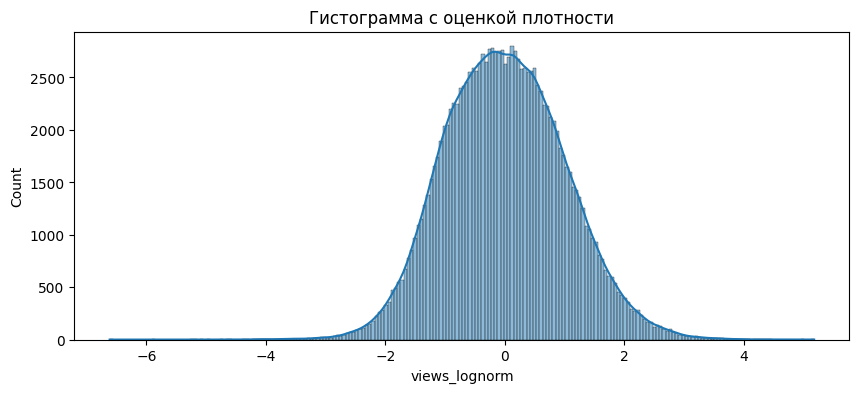

In [ ]:
column_data = df['views_lognorm']

# Построение гистограммы
plt.figure(figsize=(10, 4))
sns.histplot(column_data, kde=True)
plt.title('Гистограмма с оценкой плотности')
plt.show()

In [ ]:
# Тест Д’Агостино
dag_test = normaltest(column_data)
print('Тест Д’Агостино: статистика=%.3f, p-значение=%.3f' % dag_test)

Тест Д’Агостино: статистика=407.198, p-значение=0.000


Вывод: следуя данному тесту, вид распределения - ненормальный.

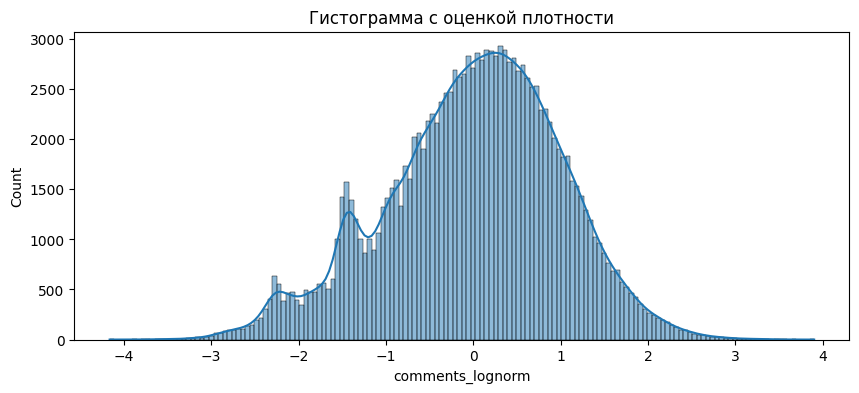

In [ ]:
column_data2 = df['comments_lognorm']

# Построение гистограммы
plt.figure(figsize=(10, 4))
sns.histplot(column_data2, kde=True)
plt.title('Гистограмма с оценкой плотности')
plt.show()

In [ ]:
# Тест Д’Агостино
dag_test2 = normaltest(column_data2)
print('Тест Д’Агостино: статистика=%.3f, p-значение=%.3f' % dag_test2)

Тест Д’Агостино: статистика=1850.497, p-значение=0.000


Вывод: следуя данному тесту, вид распределения - ненормальный.

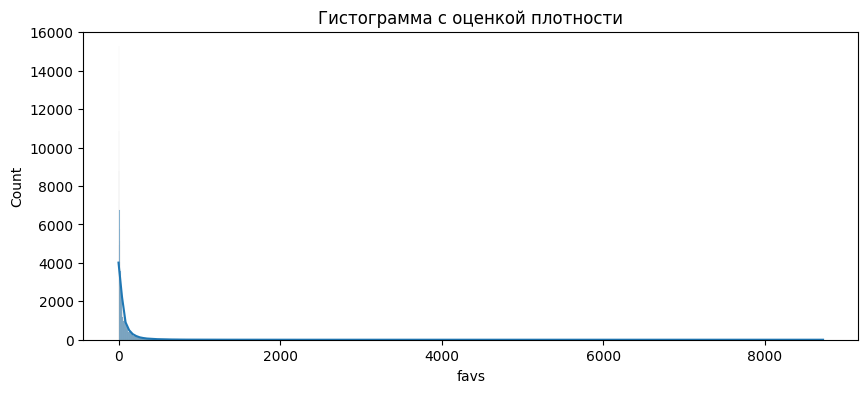

In [ ]:
column_data3 = df['favs']

# Построение гистограммы
plt.figure(figsize=(10, 4))
sns.histplot(column_data3, kde=True)
plt.title('Гистограмма с оценкой плотности')
plt.show()

In [ ]:
# Тест Д’Агостино
dag_test3 = normaltest(column_data3)
print('Тест Д’Агостино: статистика=%.3f, p-значение=%.3f' % dag_test3)

Тест Д’Агостино: статистика=200513.152, p-значение=0.000


Вывод: следуя данному тесту, вид распределения - ненормальный.

## 3. Выдвинуть и проверить гипотезу

3.1. Гипотеза 1: Количество просмотров (views) прямопропорционально количеству комментариев (comments)

In [ ]:
correlation = df['views'].corr(df['comments'])
print(f"Коэффициент корреляции между views и comments: {correlation}")

Коэффициент корреляции между views и comments: 0.29003508403673295


Вывод: результат говорит скорее о присутствии положительной корреляции между признаками.

In [ ]:
from scipy.stats import spearmanr

H0 = 'Количество просмотров (views) положительно коррелиркют с количеством комментариев (comments)'
alpha = 0.05
corr, p = spearmanr(df['views'], df['comments'])

print(corr,p)
if p<=alpha:
    print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу о наличии зависимости между переменными.")
else:
    print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу.")

0.2762932902855405 0.0
0.0 > 0.05. Мы не можем отвергнуть нулевую гипотезу о наличии зависимости между переменными.


Вывод: нулевая гипотеза была принята.

3.2. Гипотеза 2: Нет значимой разницы между средним значением количества "лайков" и "дизлайков".

In [ ]:
from scipy.stats import f_oneway

In [ ]:
_, p = f_oneway(df['views'], df['comments'])

In [ ]:
H0 = 'Нет значимой разницы между средним значением количества "лайков" и "дизлайков"'
H1 = 'Есть значимая разница между средним значением количества "лайков" и "дизлайков"'

if p>alpha:
  print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
else:
  print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {H1}")

0.0 <= 0.05. Мы отвергаем нулевую гипотезу. Есть значимая разница между средним значением количества "лайков" и "дизлайков"


Вывод: как показал тест ANOVA, нулевая гипотеза - ошибочна.